In [132]:
!pip install ucimlrepo

In [189]:
from ucimlrepo import fetch_ucirepo

# Other packages:
import xgboost as xgb
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import plotly.express as px

In [134]:
# fetch dataset
apartment_for_rent_classified = fetch_ucirepo(id=555)

# data (as pandas dataframes)
X = apartment_for_rent_classified.data.features
y = apartment_for_rent_classified.data.targets

# metadata
print(apartment_for_rent_classified.metadata)

# variable information
print(apartment_for_rent_classified.variables)


{'uci_id': 555, 'name': 'Apartment for Rent Classified', 'repository_url': 'https://archive.ics.uci.edu/dataset/555/apartment+for+rent+classified', 'data_url': 'https://archive.ics.uci.edu/static/public/555/data.csv', 'abstract': 'This is a dataset of classified for apartments for rent in USA.\n', 'area': 'Business', 'tasks': ['Classification', 'Regression', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 10000, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': [], 'target_col': None, 'index_col': ['id'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Mon Feb 26 2024', 'dataset_doi': '10.24432/C5X623', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': "The dataset contains of 10'000 or 100'000 rows and of 22 columns The data has been cleaned in the way that \r\ncolumn price and square_feet never is empty but the dataset is saved as it was created.\r\n\r\n

/usr/local/lib/python3.10/dist-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (0,5,6,12,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


In [135]:
apartment_for_rent_classified.keys()

dict_keys(['data', 'metadata', 'variables'])

In [136]:
apartment_for_rent_classified['data'].keys()

dict_keys(['ids', 'features', 'targets', 'original', 'headers'])

In [137]:
df=apartment_for_rent_classified['data']['original']

In [138]:
df.head()

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668640009,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",NaN,1,1,USD,No,Thumbnail,...,2195,Monthly,542,507 509 Esplanade,Redondo Beach,CA,33.8520,-118.3759,RentLingo,1.577360e+09
1,5668639818,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",NaN,1.5,3,USD,No,Thumbnail,...,1250,Monthly,1500,146 Lochview Dr,Newport News,VA,37.0867,-76.4941,RentLingo,1.577360e+09
2,5668639686,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,NaN,2,3,USD,No,Thumbnail,...,1395,Monthly,1650,3101 Morningside Dr,Raleigh,NC,35.8230,-78.6438,RentLingo,1.577360e+09
3,5668639659,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",NaN,1,2,USD,No,Thumbnail,...,1600,Monthly,820,209 Aegean Way,Vacaville,CA,38.3622,-121.9712,RentLingo,1.577360e+09
4,5668639374,housing/rent/apartment,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",NaN,1,1,USD,No,Thumbnail,...,975,Monthly,624,4805 Marquette NE,Albuquerque,NM,35.1038,-106.6110,RentLingo,1.577360e+09


In [ ]:
# Count of records per state
# needed to drop 2 values as they were not valid states
states_df = df.drop(df[(df['state'] == '1550831790') | (df['state'] == 'RentDigs.com')].index)

state_counts = states_df.groupby('state').size().reset_index(name='count')
state_counts

,state,count
0,AK,58
1,AL,354
2,AR,598
3,AZ,2384
4,CA,10341
5,CO,6295
6,CT,515
7,DC,93
8,DE,7
9,FL,5788


In [ ]:
# Putting it on a map

dfdemo_map = pd.DataFrame(state_counts, columns=['state', 'count'])

# plot a choropleth with color range by count per state
fig = px.choropleth(dfdemo_map,
                    locations='state',
                    locationmode="USA-states",
                    scope="usa",
                    color='count',
                    color_continuous_scale="Oranges",
                   )
fig.add_scattergeo(
    locations=dfdemo_map['state'],
    locationmode="USA-states",
    text = dfdemo_map['count'],
    featureidkey="properties.NAME_3",
    mode = 'text',
    textfont=dict(
            family="helvetica",
            size=10,
            color="black"
    ))

In [ ]:
# Average rent price per state

avg_by_state = states_df.groupby('state')['price'].mean().round(2).to_frame().reset_index()
avg_by_state

,state,price
0,AK,1050.76
1,AL,959.80
2,AR,874.37
3,AZ,1119.57
4,CA,2463.77
5,CO,1554.38
6,CT,1264.52
7,DC,2112.14
8,DE,1154.86
9,FL,1573.31


In [ ]:
# Putting it on a map

dfdemo_map = pd.DataFrame(avg_by_state, columns=['state', 'price'])

# plot a choropleth with color range by count per state
fig = px.choropleth(dfdemo_map,
                    locations='state',
                    locationmode="USA-states",
                    scope="usa",
                    color='price',
                    color_continuous_scale="Blues",
                   )
fig.add_scattergeo(
    locations=dfdemo_map['state'],
    locationmode="USA-states",
    text = dfdemo_map['price'],
    featureidkey="properties.NAME_3",
    mode = 'text',
    textfont=dict(
            family="helvetica",
            size=8,
            color="black"
    ))

In [139]:
# Beginning data cleaning
# Checking for duplicate ID values, most are townhomes with 2 identical listings in one location
ids = df["id"]
df[ids.isin(ids[ids.duplicated()])].sort_values("id").head()

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
79799,5195387513,housing/rent/apartment,Townhome like Duplex,Lemon Grove two Level Upgraded 2 Beds attached...,"Dishwasher,Washer Dryer",1.5,2,USD,No,Thumbnail,...,2450,Monthly,820.0,7241 Balkis,Lemon Grove,CA,32.7331,-117.0332,RentDigs.com,1.550654e+09
83544,5195387513,housing/rent/apartment,Townhome like Duplex,Lemon Grove two Level Upgraded 2 Beds attached...,"Dishwasher,Washer Dryer",1.5,2,USD,No,Thumbnail,...,2450,Monthly,820.0,7241 Balkis,Lemon Grove,CA,32.7331,-117.0332,RentDigs.com,1.550654e+09
79798,5197678700,housing/rent/apartment,This Apartment is a must see!,"Square footage: 983 square ft, unit number: 07...",NaN,1,3,USD,No,Yes,...,1489,Monthly,983.0,NaN,Memphis,TN,35.1478,-90.0521,RentDigs.com,1.550813e+09
83543,5197678700,housing/rent/apartment,This Apartment is a must see!,"Square footage: 983 square ft, unit number: 07...",NaN,1,3,USD,No,Yes,...,1489,Monthly,983.0,NaN,Memphis,TN,35.1478,-90.0521,RentDigs.com,1.550813e+09
79797,5197682059,housing/rent/apartment,"Spacious One BR, One BA","The of Olathe, a great you canhome where we ta...","Gym,Playground,Pool",1,1,USD,No,Yes,...,832,Monthly,660.0,NaN,Olathe,KS,38.8843,-94.8710,RentDigs.com,1.550813e+09


In [140]:
# We decided to not remove duplicates because they are techinically unique places to rent, even if they are the exact same in other ways

#df = df.drop_duplicates()
#ids = df["id"]
#f[ids.isin(ids[ids.duplicated()])].sort_values("id")

In [141]:
# This counts the # of commas in the amenities column, which is one less than the actual number of amenities(fixed in next cell)
# This makes the amenities column a useful metric

df['amenities_count'] = df.amenities.str.count(',')
df.head()

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_type,square_feet,address,cityname,state,latitude,longitude,source,time,amenities_count
0,5668640009,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",NaN,1,1,USD,No,Thumbnail,...,Monthly,542,507 509 Esplanade,Redondo Beach,CA,33.8520,-118.3759,RentLingo,1.577360e+09,NaN
1,5668639818,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",NaN,1.5,3,USD,No,Thumbnail,...,Monthly,1500,146 Lochview Dr,Newport News,VA,37.0867,-76.4941,RentLingo,1.577360e+09,NaN
2,5668639686,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,NaN,2,3,USD,No,Thumbnail,...,Monthly,1650,3101 Morningside Dr,Raleigh,NC,35.8230,-78.6438,RentLingo,1.577360e+09,NaN
3,5668639659,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",NaN,1,2,USD,No,Thumbnail,...,Monthly,820,209 Aegean Way,Vacaville,CA,38.3622,-121.9712,RentLingo,1.577360e+09,NaN
4,5668639374,housing/rent/apartment,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",NaN,1,1,USD,No,Thumbnail,...,Monthly,624,4805 Marquette NE,Albuquerque,NM,35.1038,-106.6110,RentLingo,1.577360e+09,NaN


In [142]:
# Replace NA values with -1 and add 1 to all amenities values so that NA values are 0 and all other amenities values have the correct number
df['amenities_count']=df['amenities_count'].fillna(-1)
df['amenities_count']=df['amenities_count']+1
df['amenities_count']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
99821     6.0
99822    13.0
99823     2.0
99824     2.0
99825     3.0
Name: amenities_count, Length: 99826, dtype: float64

In [143]:
# Turn pets_allowed into a column of 0 and 1 where 0 is not allowed and 1 is allowed
df['pets_allowed'] = np.where(df['pets_allowed'].isna(), 0, 1)

In [144]:
# Checking what values are in the fee column
df['fee'].unique()

array(['No', nan, '1380', '2150', 'Yes', '1019'], dtype=object)

In [145]:
# Making column usable by turning all yes's into 1 and everything else into 0 (no's)
df['fee'] = np.where(df['fee']=='Yes',1,0)

In [146]:
# Making sure it worked
df['fee'].unique()

array([0, 1])

In [147]:
# narrowing down the dataframe to only include the features we want to use
usables=df[['amenities_count','pets_allowed','price','bathrooms','fee','bedrooms','square_feet','latitude','longitude']]
print(usables.dtypes)
usables.head()

amenities_count    float64
pets_allowed         int64
price              float64
bathrooms           object
fee                  int64
bedrooms            object
square_feet         object
latitude           float64
longitude          float64
dtype: object


,amenities_count,pets_allowed,price,bathrooms,fee,bedrooms,square_feet,latitude,longitude
0,0.0,1,2195.0,1,0,1,542,33.8520,-118.3759
1,0.0,1,1250.0,1.5,0,3,1500,37.0867,-76.4941
2,0.0,0,1395.0,2,0,3,1650,35.8230,-78.6438
3,0.0,1,1600.0,1,0,2,820,38.3622,-121.9712
4,0.0,1,975.0,1,0,1,624,35.1038,-106.6110


In [148]:
# saw that there were columns with the type object, checking to see why that is
print(usables['bathrooms'].unique())
print(usables['bedrooms'].unique())
print(usables['square_feet'].unique())

['1' '1.5' '2' '2.5' '3' '3.5' '4' '7' '4.5' nan '5' '8' '8.5' '6' '5.5'
 'No' '9' '7.5' 'Thumbnail' 1.0 2.0 2.5 1.5 4.0 3.0 3.5 4.5]
['1' '3' '2' '4' '0' '5' '7' '8' nan '6' '9' 'Thumbnail' 'Cats,Dogs' 2.0
 3.0 1.0 4.0 5.0 0.0 6.0]
['542' '1500' '1650' ... 334 3980 2932]


In [149]:
# To fix the incorrent values we found above, we convert each column to numeric values
# If there is an error (i.e. it finds a string), it removes the row
# Sacrificing some records to make sure our data is clean and usable
usables["square_feet"] = pd.to_numeric(df["square_feet"], errors="coerce")
usables["bedrooms"] = pd.to_numeric(df["bedrooms"], errors="coerce")
usables["bathrooms"] = pd.to_numeric(df["bathrooms"], errors="coerce")

<ipython-input-149-86060f9d94e7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usables["square_feet"] = pd.to_numeric(df["square_feet"], errors="coerce")
<ipython-input-149-86060f9d94e7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usables["bedrooms"] = pd.to_numeric(df["bedrooms"], errors="coerce")
<ipython-input-149-86060f9d94e7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [150]:
# Checking to make sure it worked and counting the NA values
print("BATHROOMS")
print(usables['bathrooms'].unique())
print(usables['bathrooms'].isna().value_counts())

print("BEDROOMS")
print(usables['bedrooms'].unique())
print(usables['bedrooms'].isna().value_counts())

print("SQUARE FEET")
print(usables['square_feet'].unique())
print(usables['square_feet'].isna().value_counts())

BATHROOMS
[1.  1.5 2.  2.5 3.  3.5 4.  7.  4.5 nan 5.  8.  8.5 6.  5.5 9.  7.5]
bathrooms
False    99757
True        69
Name: count, dtype: int64
BEDROOMS
[ 1.  3.  2.  4.  0.  5.  7.  8. nan  6.  9.]
bedrooms
False    99696
True       130
Name: count, dtype: int64
SQUARE FEET
[ 542. 1500. 1650. ... 2292. 3980. 2932.]
square_feet
False    99821
True         5
Name: count, dtype: int64


In [151]:
# Dropping any NA values from our narrowed dataset
for col in usables:
  usables[col]=usables[col].astype(float)
usables.dropna(inplace=True)

<ipython-input-151-344e20ce14e5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usables[col]=usables[col].astype(float)
<ipython-input-151-344e20ce14e5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usables[col]=usables[col].astype(float)
<ipython-input-151-344e20ce14e5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [152]:
usables

,amenities_count,pets_allowed,price,bathrooms,fee,bedrooms,square_feet,latitude,longitude
0,0.0,1.0,2195.0,1.0,0.0,1.0,542.0,33.8520,-118.3759
1,0.0,1.0,1250.0,1.5,0.0,3.0,1500.0,37.0867,-76.4941
2,0.0,0.0,1395.0,2.0,0.0,3.0,1650.0,35.8230,-78.6438
3,0.0,1.0,1600.0,1.0,0.0,2.0,820.0,38.3622,-121.9712
4,0.0,1.0,975.0,1.0,0.0,1.0,624.0,35.1038,-106.6110
...,...,...,...,...,...,...,...,...,...
99821,6.0,0.0,780.0,1.0,0.0,1.0,605.0,29.6151,-95.1998
99822,13.0,1.0,813.0,2.0,0.0,2.0,921.0,30.2254,-81.7579
99823,2.0,1.0,1325.0,1.0,0.0,1.0,650.0,32.7379,-117.0914
99824,2.0,1.0,931.0,1.0,0.0,1.0,701.0,35.4158,-80.8451


<Axes: >

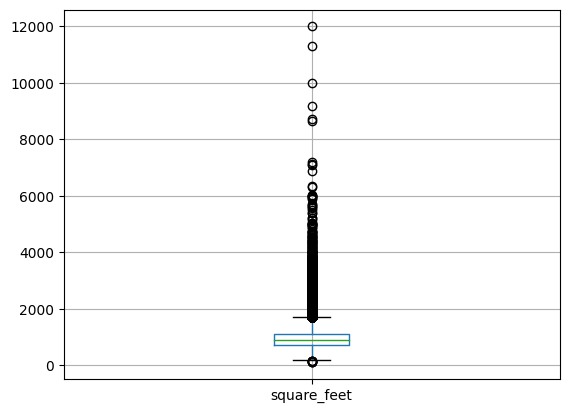

In [153]:
# After going through our model, we thought that there might be outliers throwing our results off, so we decided to check
usables[['square_feet']].boxplot()

<Axes: >

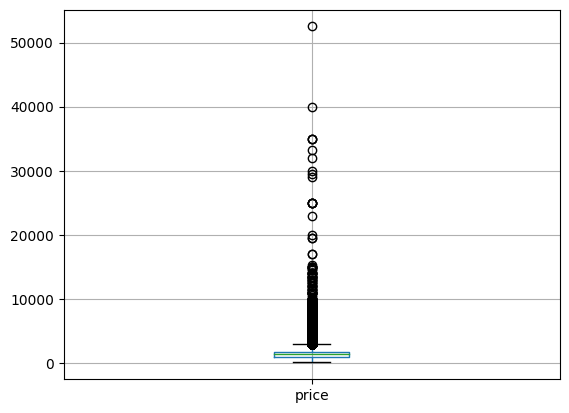

In [154]:
usables[['price']].boxplot()

In [187]:
#Looking at the graphs, it seems like we have alot of outliers (especially in price) so we wanted to check out what was happening

# Using the orginal df so we can look at other columns for context;
# this does not have any effect is the data cleaning would not have removed any of the values we a looking at here
price_sorted = df.sort_values('price',ascending = False)
price_sorted = price_sorted[["amenities", "bathrooms", "bedrooms", "pets_allowed", "price", "square_feet","cityname","state"]]

price_sorted.head(10)
# first entry is almost 100% a mistake, it just does not make sense when looking at the square feet, number of bathrooms, amenities, etc.
# some of these top entries could make sense, but there are also quite a few that look more like mistakes

,amenities,bathrooms,bedrooms,pets_allowed,price,square_feet,cityname,state
6863,"AC,Cable or Satellite,Internet Access,Patio/De...",1,0,0,52500.0,1418,Barstow,CA
41235,"Clubhouse,Elevator,Fireplace,Gated,Gym,Parking...",8,6,0,40000.0,7145,Los Angeles,CA
28084,"Dishwasher,Elevator,Fireplace,Parking,Patio/De...",5,7,0,35000.0,5586,West Hollywood,CA
41018,"Elevator,Hot Tub,Patio/Deck,Pool",7.5,6,0,35000.0,6366,West Hollywood,CA
17178,Parking,4,4,0,35000.0,2269,West Hollywood,CA
46120,Parking,2.5,3,0,33165.0,2211,Pacific Palisades,CA
38776,"Elevator,Fireplace,Parking,Patio/Deck,TV",9,6,0,32000.0,5055,Los Angeles,CA
14447,"Dishwasher,Elevator,Fireplace,Hot Tub,View,Was...",5.5,5,0,30000.0,5872,Snowmass Village,CO
35337,"Elevator,Fireplace,Gym,Parking,Patio/Deck,Pool...",NaN,6,0,29500.0,11000,Los Angeles,CA
31326,"Parking,Patio/Deck,View",3,3,0,29500.0,4291,Venice,CA


In [156]:
sqfeet_sorted = df[["amenities", "bathrooms", "bedrooms", "pets_allowed", "price", "square_feet","cityname","state"]]
# Have to do this here in order to sort the values, but again, need to use original df to use other columns
sqfeet_sorted["square_feet"] = pd.to_numeric(df["square_feet"], errors="coerce")

sqfeet_sorted = sqfeet_sorted.sort_values('square_feet',ascending = False)
sqfeet_sorted.head(10)
# Once again, we see some that might make sense and others that don't and might be mistakes

<ipython-input-156-7be32439ce36>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sqfeet_sorted["square_feet"] = pd.to_numeric(df["square_feet"], errors="coerce")


,amenities,bathrooms,bedrooms,pets_allowed,price,square_feet,cityname,state
51975,"Cable or Satellite,Doorman,Gym,Storage,TV,Tenn...",NaN,1,0,2640.0,50000.0,NaN,NaN
7153,"Basketball,Cable or Satellite,Doorman,Hot Tub,...",NaN,1,0,4790.0,40000.0,New York,NY
51267,"Elevator,Parking,Pool,Refrigerator",1,0,1,565.0,12000.0,Euclid,OH
3907,NaN,8.5,6,0,11000.0,11318.0,Potomac,MD
35337,"Elevator,Fireplace,Gym,Parking,Patio/Deck,Pool...",NaN,6,0,29500.0,11000.0,Los Angeles,CA
22929,Parking,1,0,1,4000.0,9998.0,Steubenville,OH
29873,NaN,1,0,0,1475.0,9175.0,Los Angeles,CA
3487,NaN,8,6,0,25000.0,8716.0,Montecito,CA
96108,"AC,Cable or Satellite,Dishwasher,Fireplace,Gym...",6,5,0,11500.0,8643.0,Bedford,NY
38679,"Elevator,Fireplace,Gym,Parking,Patio/Deck,Pool...",6,6,0,29000.0,7213.0,Beverly Hills,CA


In [157]:
# Due to the discpencies and how overall they are scewing the data, we decided to remove the outliers.

usables=usables[
    (np.abs(
        stats.zscore(usables[['price','square_feet']]))
    < 3).all(axis=1)]


In [102]:
# After removing outliers (see above) we are down to ~95k rows from ~100k
usables

,amenities_count,pets_allowed,price,bathrooms,fee,bedrooms,square_feet,latitude,longitude
60442,2.0,0.0,789.0,1.0,0.0,1.0,521.0,32.7722,-97.0041
77297,4.0,0.0,850.0,2.0,0.0,2.0,1037.0,48.3874,-102.9715
95476,6.0,0.0,1265.0,1.0,0.0,1.0,874.0,33.8544,-84.0083
87426,6.0,1.0,775.0,1.0,0.0,2.0,900.0,27.7682,-97.4003
19188,7.0,0.0,1080.0,1.0,0.0,2.0,850.0,40.5059,-80.1869
...,...,...,...,...,...,...,...,...,...
27206,1.0,0.0,3100.0,2.0,0.0,4.0,1000.0,42.3280,-71.0710
13812,3.0,0.0,959.0,2.0,0.0,2.0,961.0,35.6775,-78.7763
63932,6.0,0.0,880.0,2.0,0.0,2.0,960.0,30.1591,-92.0272
12007,4.0,0.0,1746.0,2.0,0.0,3.0,1197.0,37.1275,-76.5219


<Axes: >

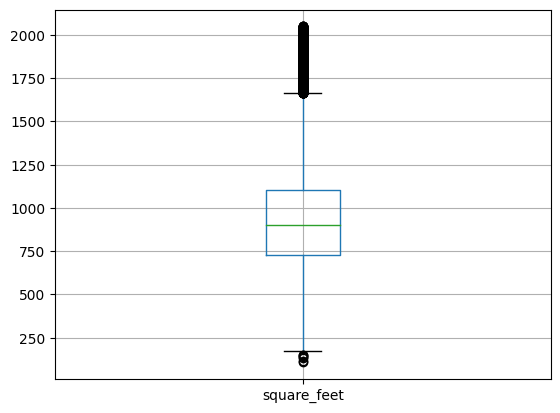

In [103]:
# plots are a lot more evenly distributed
usables[['square_feet']].boxplot()

<Axes: >

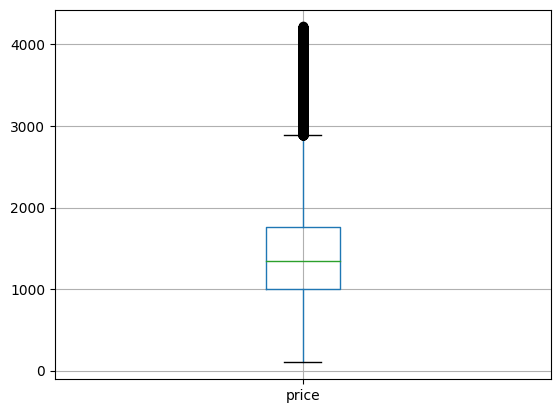

In [104]:
usables[['price']].boxplot()

In [105]:
# Making sure all columns are the correct type (float numbers)
print(usables.dtypes)
usables.head()

amenities_count    float64
pets_allowed       float64
price              float64
bathrooms          float64
fee                float64
bedrooms           float64
square_feet        float64
latitude           float64
longitude          float64
dtype: object


,amenities_count,pets_allowed,price,bathrooms,fee,bedrooms,square_feet,latitude,longitude
60442,2.0,0.0,789.0,1.0,0.0,1.0,521.0,32.7722,-97.0041
77297,4.0,0.0,850.0,2.0,0.0,2.0,1037.0,48.3874,-102.9715
95476,6.0,0.0,1265.0,1.0,0.0,1.0,874.0,33.8544,-84.0083
87426,6.0,1.0,775.0,1.0,0.0,2.0,900.0,27.7682,-97.4003
19188,7.0,0.0,1080.0,1.0,0.0,2.0,850.0,40.5059,-80.1869


array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'square_feet'}>],
       [<Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'amenities_count'}>]], dtype=object)

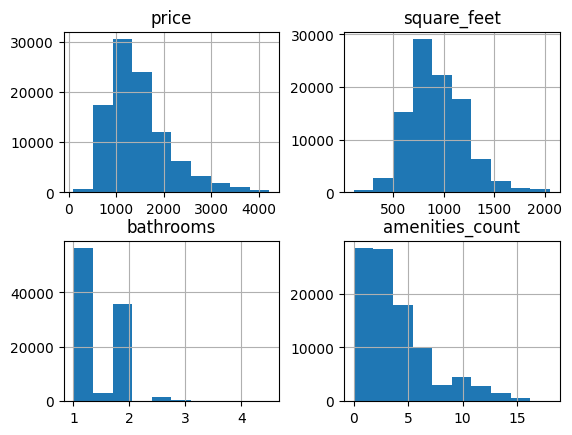

In [ ]:
# Visualizing features
usables[["price","square_feet","bathrooms","amenities_count"]].hist()

<Axes: title={'center': 'pets_allowed'}, ylabel='count'>

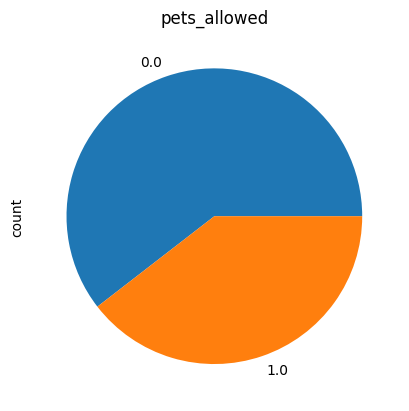

In [183]:
usables['pets_allowed'].value_counts().plot(kind='pie', title = "pets_allowed")

<Axes: title={'center': 'fee'}, ylabel='count'>

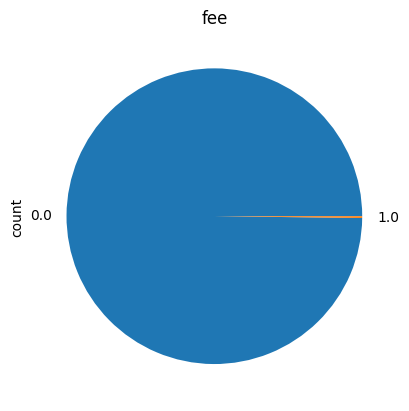

In [184]:
usables['fee'].value_counts().plot(kind='pie', title = "fee")

In [185]:
# Proportion of fee values
usables["fee"].value_counts(normalize=True)*100

fee
0.0    99.80917
1.0     0.19083
Name: proportion, dtype: float64

In [120]:
# Randomizing data and splitting into training and test dataframes

usables = usables.reindex(np.random.permutation(usables.index))
n = len(usables)
train_df = usables[0:int(n*0.7)]

test_df = usables[int(n*0.7):]

y_train = train_df[['price']].values
X_train = train_df.loc[:, train_df.columns != 'price'].values
y_test = test_df[['price']].values
X_test = test_df.loc[:, test_df.columns != 'price'].values

9

In [158]:
# Other method of splitting the data; both tested and offer similar results, both fluctuate a bit in the end model results

y = np.array(usables['price'])
# Remove the labels from the features
# axis 1 refers to the columns
X = usables.drop('price', axis = 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [193]:
# Create a baseline random regressor
# The strategy “mean” always predicts the mean of the training set
dummy_reg = DummyRegressor(strategy='mean')

# Fit the baseline classifier on the training data
dummy_reg.fit(X_train, y_train)

# Make predictions on the test data
baseline_pred = dummy_reg.predict(X_test)

baseline_score = r2_score(y_test, baseline_pred)
print("The r2 score of the baseline model is {}, meaning it is not accurate at all".format(round(baseline_score, 2)))

MSE_baseline = mean_squared_error(y_test, baseline_pred)
print("The MSE of our baseline model is {}".format(round(MSE_baseline, 2)))
print("This means we have an average error of ${} when predicting rent price with the baseline model".format(round(math.sqrt(MSE_baseline),2)))

The r2 score of the baseline model is -0.0, meaning it is not accurate at all
The MSE of our baseline model is 412564.78
This means we have an average error of $642.31 when predicting rent price with the baseline model


In [159]:
# Use "hist" for training the model.
reg = xgb.XGBRegressor(tree_method="hist")
# Fit the model using predictor X and response y.
reg.fit(X_train, y_train)
# Save model into JSON format.
reg.save_model("regressor.json")

In [160]:
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

In [161]:
train_score = r2_score(y_train, y_train_pred)
print("The accuracy of our model on the training data is {}%".format(round(train_score, 2) *100))

test_score = r2_score(y_test, y_test_pred)
print("The accuracy of our model on the test data is {}%".format(round(test_score, 2) *100))

The accuracy of our model on the training data is 84.0%
The accuracy of our model on the test data is 81.0%


In [163]:
MSE_train = mean_squared_error(y_train,y_train_pred)
print("The MSE of our predictions against the training data is {}".format(round(MSE_train, 2)))
print("This means we have an average error of ${} when predicting rent price on the training data".format(round(math.sqrt(MSE_train),2)))

MSE_test = mean_squared_error(y_test,y_test_pred)
print("The  MSE of our predictions against the test data is {}".format(round(MSE_test, 2)))
print("This means we have an average error of ${} when predicting rent price on the test data".format(round(math.sqrt(MSE_test),2)))


The MSE of our predictions against the training data is 63845.12
This means we have an average error of $252.68 when predicting rent price on the training data
The  MSE of our predictions against the test data is 79195.26
This means we have an average error of $281.42 when predicting rent price on the test data


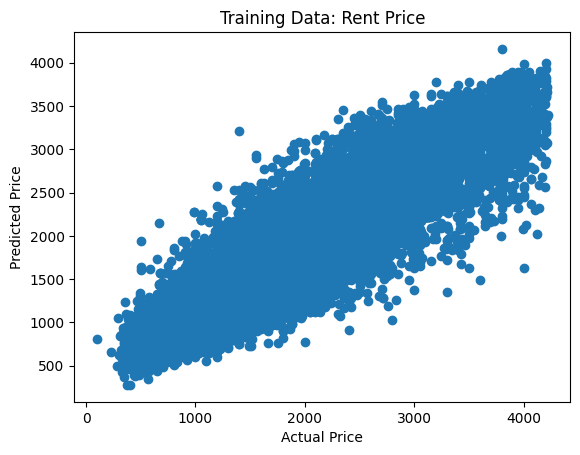

In [179]:
plt.scatter(y_train, y_train_pred)
plt.title("Training Data: Rent Price")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

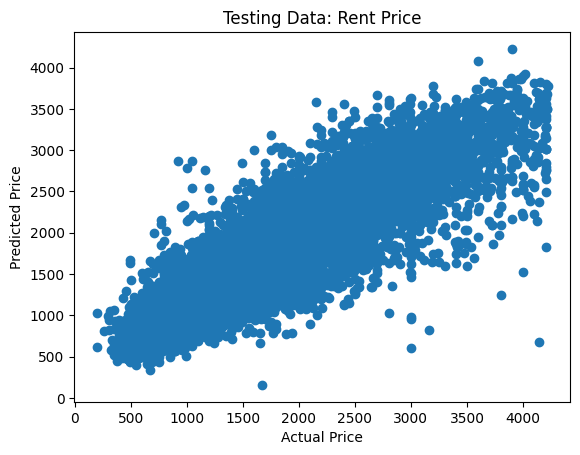

In [180]:
plt.scatter(y_test, y_test_pred)
plt.title("Testing Data: Rent Price")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()